# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.
Instructions

    1 Get the numerical variables from our dataset.
    2 Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
    3 Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:/Users/josefin/01_IRONHACK/Week4/Day4.3/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Get the numerical variables from our dataset.

In [4]:
numeric = data.select_dtypes(np.number)

## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

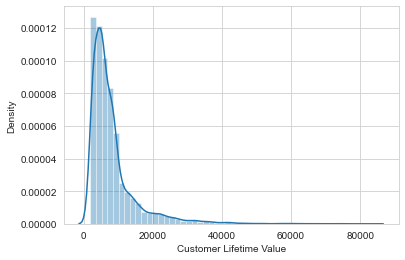

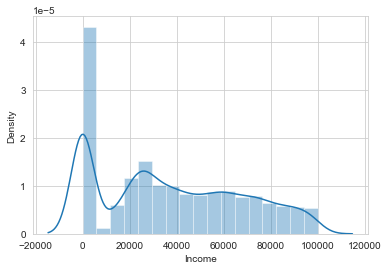

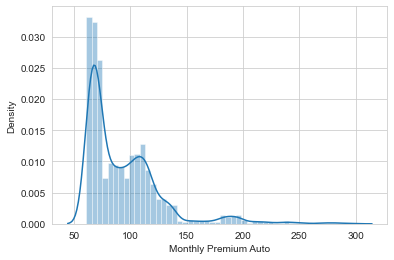

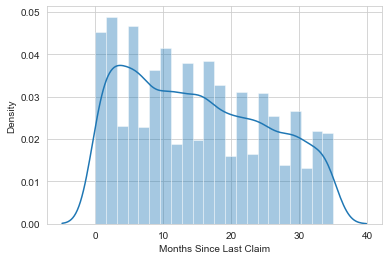

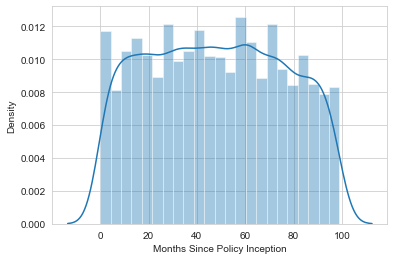

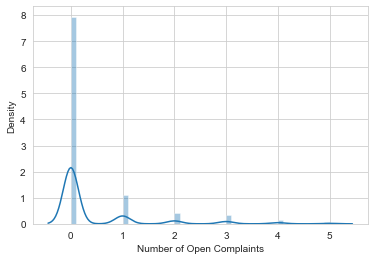

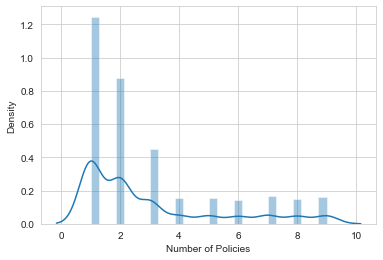

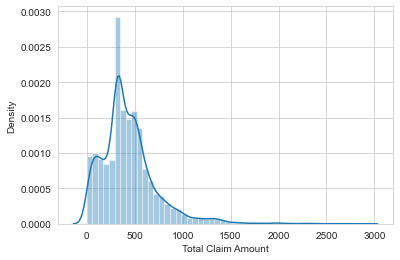

In [5]:
for i in numeric.columns:
    sns.distplot(numeric[i])
    plt.show()

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### check skew of numerical distributions

In [6]:
def check_skew(data):
    
    from scipy.stats import skew
    
    cols = list(data.columns)
    
    for col in cols:
        sk = data[col].skew()
        print("The skew of '{}' is: {}".format(col,sk))

In [7]:
check_skew(numeric)

#high skewness for 'Customer Lifetime Value', 'Monthly Premium Auto' and 'Number of Open Complaints'
#seperate them to apply log transformation or boxcox to deal with the outliers and, thus, reduce the skewness

The skew of 'Customer Lifetime Value' is: 3.032280259929985
The skew of 'Income' is: 0.28688727581189166
The skew of 'Monthly Premium Auto' is: 2.1235464499475345
The skew of 'Months Since Last Claim' is: 0.2785863118107981
The skew of 'Months Since Policy Inception' is: 0.040164961597799524
The skew of 'Number of Open Complaints' is: 2.783263052399567
The skew of 'Number of Policies' is: 1.2533327352739663
The skew of 'Total Claim Amount' is: 1.7149658097209557


### log transformation

In [8]:
numeric_log = data.select_dtypes(np.number)

In [9]:
def log_transform_clean(x):
    if np.isfinite(x) and x != 0:
        return np.log(x)
    else:
        return np.NAN

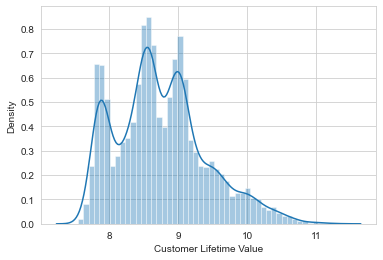

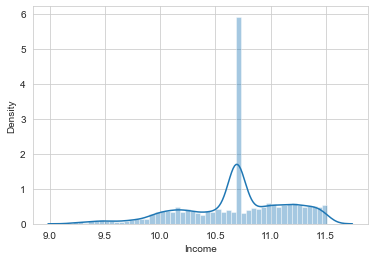

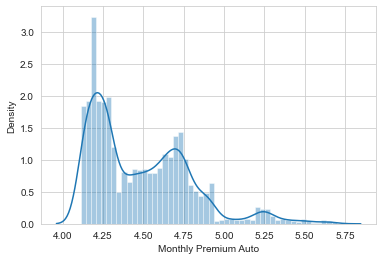

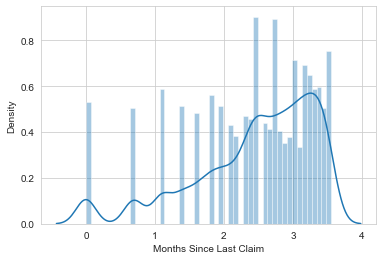

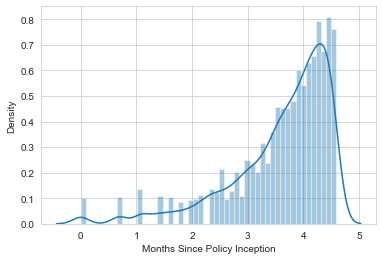

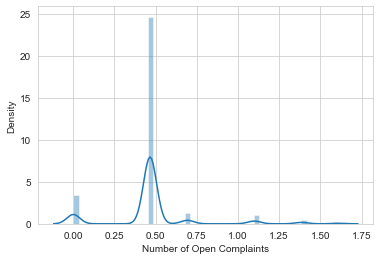

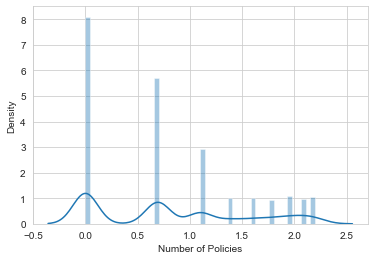

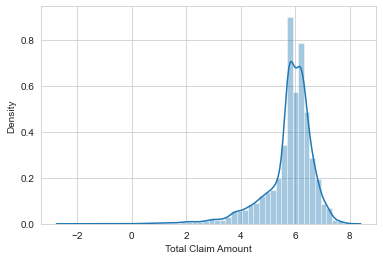

In [10]:
for i in numeric_log.columns:
    numeric_log[i] = list(map(log_transform_clean, numeric_log[i]))
    numeric_log[i] = numeric_log[i].fillna(np.mean(numeric_log[i]))
    sns.distplot(numeric_log[i], bins = 50)
    plt.show()

### boxcox transformation

In [11]:
numeric_bc = data.select_dtypes(np.number)

Customer Lifetime Value


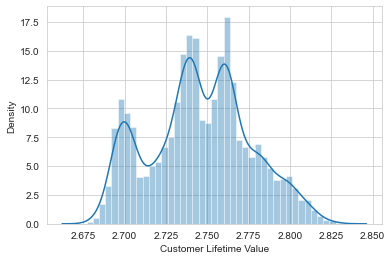

Income


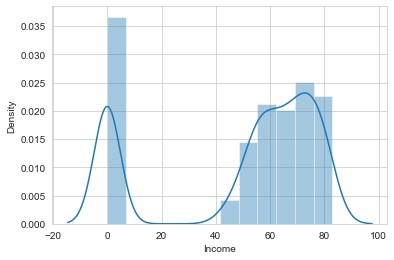

Monthly Premium Auto


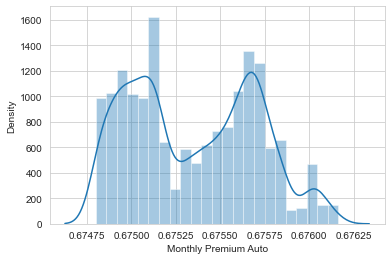

Months Since Last Claim


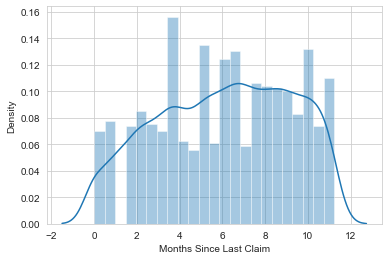

Months Since Policy Inception


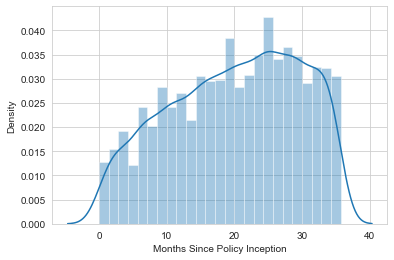

Number of Open Complaints


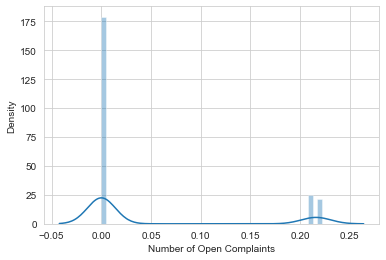

Number of Policies


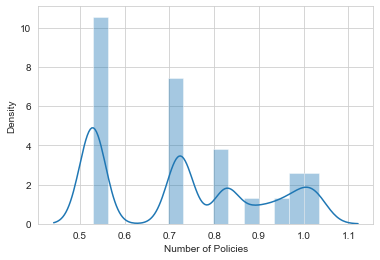

Total Claim Amount


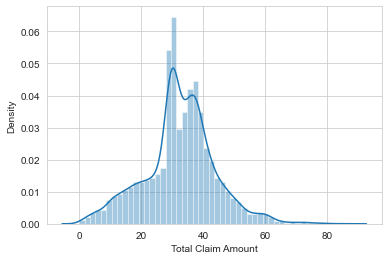

In [12]:
from scipy.stats import boxcox

for i in numeric_bc:
    numeric_bc[i] = numeric_bc[i].apply(lambda x: x+1) # to make x > 0, otherwise boxcox transformation not applyable

for i in numeric_bc.columns:
    numeric_bc[i],lambd = boxcox(numeric_bc[i])
    print(i)
    sns.distplot(numeric_bc[i])
    plt.show()

## transformations after dealing with outliers

### min-max-scaler

In [16]:
numeric_mms = data.select_dtypes(np.number)

In [17]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(numeric_mms)
x_min_max = pd.DataFrame(transformer.transform(numeric_mms))
x_min_max.shape

(9134, 8)

In [18]:
x_min_max.columns = numeric_mms.columns
x_min_max.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

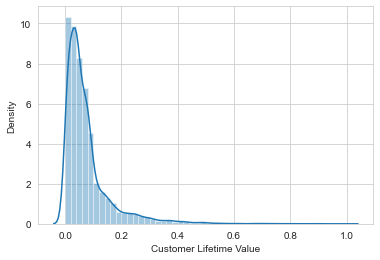

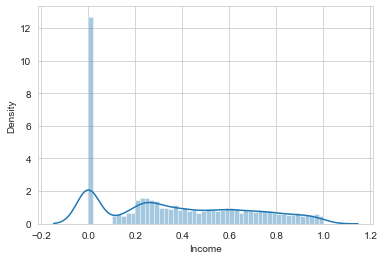

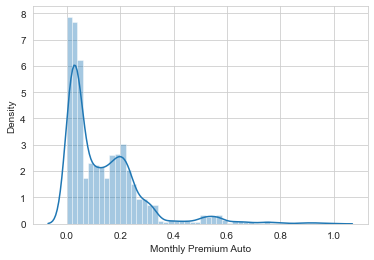

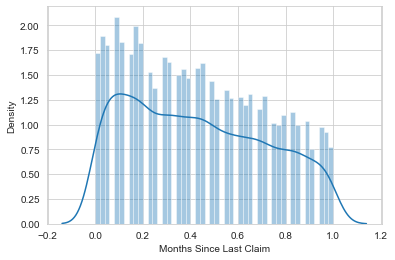

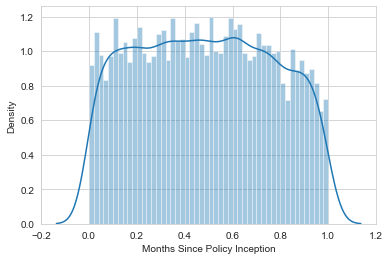

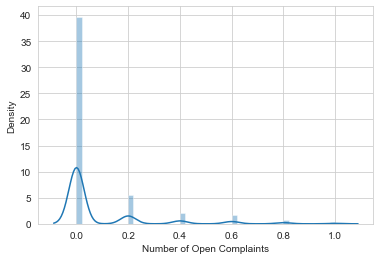

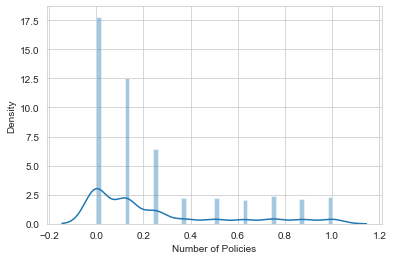

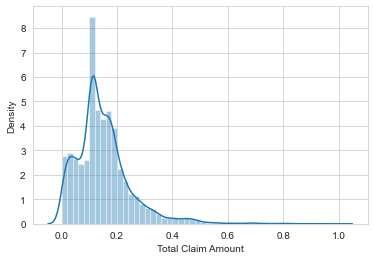

In [19]:
for i in x_min_max.columns:
    sns.distplot(x_min_max[i], bins = 50)
    plt.show()

### standardscaler

In [20]:
numeric_stsc = data.select_dtypes(np.number)

In [21]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numeric_stsc)
x_standardized = transformer.transform(numeric_stsc)
x_standardized = pd.DataFrame(x_standardized)
print(x_standardized.shape)

(9134, 8)


In [22]:
#change column names from numbers back to the original ones
x_standardized.columns = numeric_stsc.columns
x_standardized.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

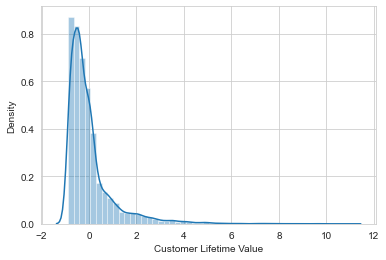

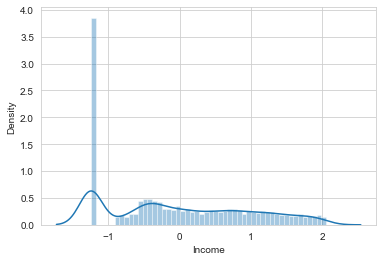

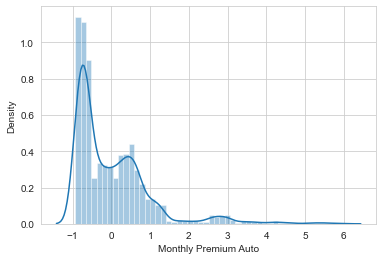

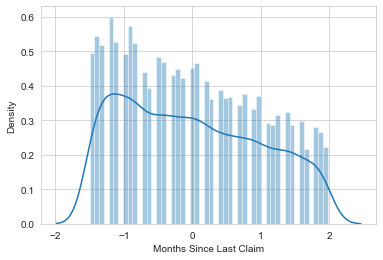

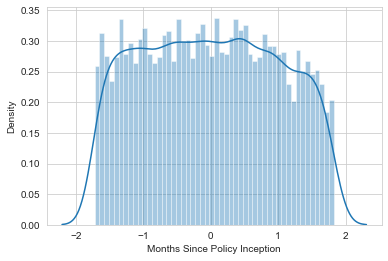

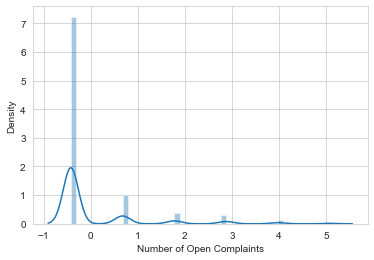

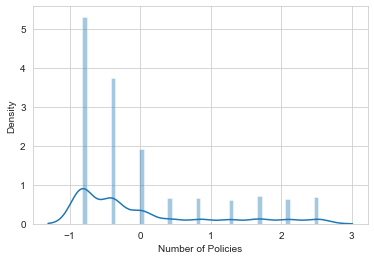

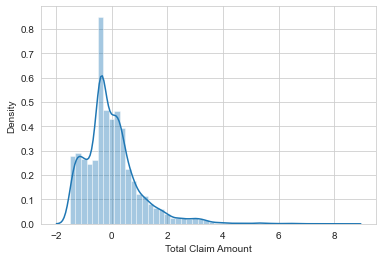

In [23]:
for i in x_standardized.columns:
    sns.distplot(x_standardized[i], bins = 50)
    plt.show()

### normalizer

In [24]:
numeric_norm = data.select_dtypes(np.number)

In [25]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(numeric_norm)
x_normalized = pd.DataFrame(transformer.transform(numeric_norm))
print(x_normalized.shape)

#change column names from numbers back to the original ones
x_normalized.columns = numeric_norm.columns
x_normalized.columns

(9134, 8)


Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

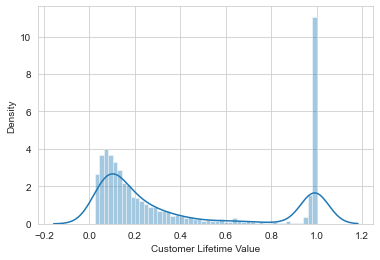

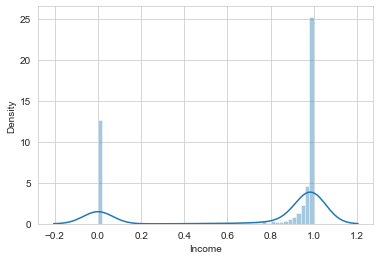

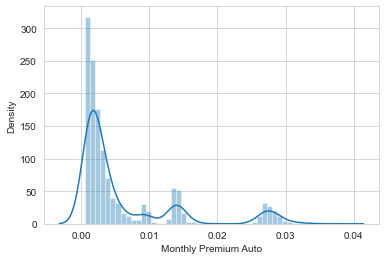

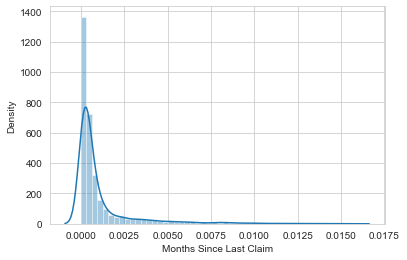

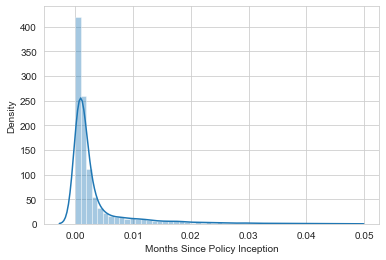

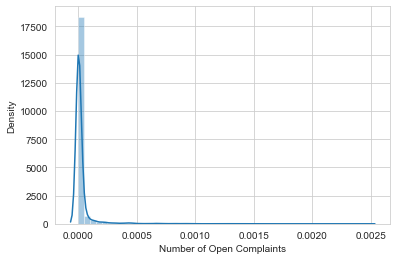

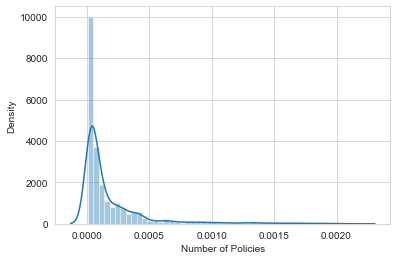

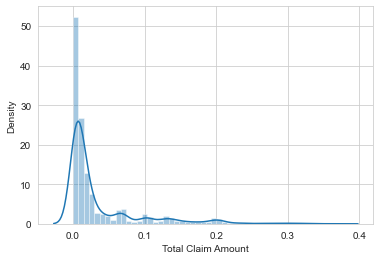

In [26]:
for i in x_normalized.columns:
    sns.distplot(x_normalized[i], bins = 50)
    plt.show()